<a href="https://colab.research.google.com/github/El-Nico/data-visualization-communication-with-python/blob/main/Immigration_Canada_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from __future__ import print_function #adds compatibility with new versions of Python
%matplotlib inline 

In [2]:
url = 'https://github.com/El-Nico/data-visualization-communication-with-python/blob/main/Datasets-20211006/Canada.xlsx?raw=true'
dataset = pd.read_excel(url, 
                       sheet_name = "Canada by Citizenship",
                       skipfooter = 2,
                       skiprows = range(20))
dataset.head(5)

Type    Coverage          OdName  AREA  ...  2010  2011  2012  2013
0  Immigrants  Foreigners     Afghanistan   935  ...  1758  2203  2635  2004
1  Immigrants  Foreigners         Albania   908  ...   561   539   620   603
2  Immigrants  Foreigners         Algeria   903  ...  4752  4325  3774  4331
3  Immigrants  Foreigners  American Samoa   909  ...     0     0     0     0
4  Immigrants  Foreigners         Andorra   908  ...     0     0     1     1

[5 rows x 43 columns]

In [3]:
dataset['Total'] = dataset.sum(axis=1)
dataset.head()

Type    Coverage          OdName  AREA  ...  2011  2012  2013  Total
0  Immigrants  Foreigners     Afghanistan   935  ...  2203  2635  2004  65977
1  Immigrants  Foreigners         Albania   908  ...   539   620   603  18433
2  Immigrants  Foreigners         Algeria   903  ...  4325  3774  4331  72156
3  Immigrants  Foreigners  American Samoa   909  ...     0     0     0   2774
4  Immigrants  Foreigners         Andorra   908  ...     0     1     1   2749

[5 rows x 44 columns]

In [4]:
dataset.set_index('OdName', inplace=True)

In [5]:
#Check the row for haiti
print(dataset.loc['Haiti'])

Type                             Immigrants
Coverage                         Foreigners
AREA                                    904
AreaName    Latin America and the Caribbean
REG                                     915
RegName                           Caribbean
DEV                                     902
DevName                  Developing regions
1980                                   1666
1981                                   3692
1982                                   3498
1983                                   2860
1984                                   1418
1985                                   1321
1986                                   1753
1987                                   2132
1988                                   1829
1989                                   2377
1990                                   2379
1991                                   2829
1992                                   2399
1993                                   3655
1994                            

In [6]:
#Checking the year 2013 and row haiti
print(dataset.loc['Haiti', 2013])

4152


In [7]:
#Converting the years to string
dataset.columns = list(map(str, dataset.columns))
[print (type(x)) for x in dataset.columns.values] 

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Text(0.5, 0, 'Years')

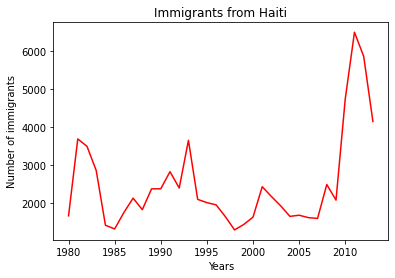

In [8]:
#LINE PLOT - IMMIGRATION FROM HAITI

#Create the range of years
years = list (map(str, range(1980, 2014))) 

dataset.loc['Haiti', years].plot(kind = 'line', color = 'red')
plt.title('Immigrants from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')


Text(20, 6000, '2010 Earthquake')

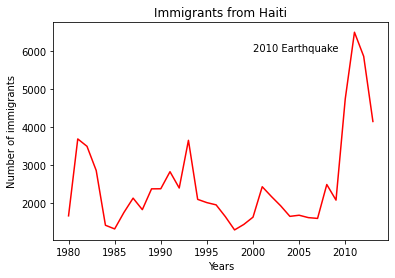

In [9]:
#ADD TEXT TO EXPLAIN THE SPIKE AROUND 2010

years = list (map(str, range(1980, 2014))) 

dataset.loc['Haiti', years].plot(kind = 'line', color = 'red')
plt.title('Immigrants from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.text(20, 6000, '2010 Earthquake')

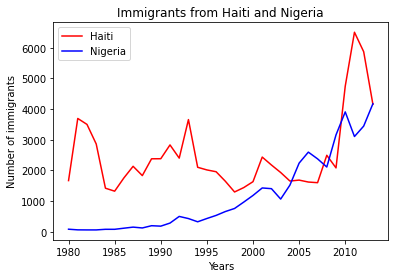

In [10]:
#Comparison of Haiti to Argentina
dataset.loc['Haiti', years].plot(kind = 'line', color = 'red')
dataset.loc['Nigeria', years].plot(kind = 'line', color = 'blue')
plt.title('Immigrants from Haiti and Nigeria')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.legend(['Haiti', 'Nigeria'])

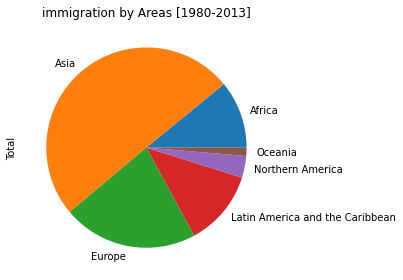

In [11]:
#PIE CHART

#Showing immigration by region

data_continents = dataset.groupby('AreaName', axis=0).sum()

data_continents['Total'].plot(kind='pie')

plt.title('immigration by Areas [1980-2013]')
plt.tight_layout()

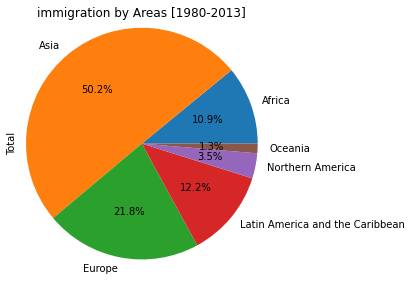

In [12]:
#PIE CHART

# With region percentages

data_continents = dataset.groupby('AreaName', axis=0).sum()

data_continents['Total'].plot(kind='pie', radius=1.2, autopct='%1.1f%%')

plt.title('immigration by Areas [1980-2013]', fontsize = 12)
plt.tight_layout()

In [13]:
#PIE CHART
#Explode a slice
data_continents = dataset.groupby('AreaName', axis = 0).sum()
data_continents

AREA     REG    DEV  ...    2012    2013    Total
AreaName                                               ...                         
Africa                           48762   49242  48708  ...   38083   38543   765660
Asia                             45815  109147  44197  ...  152218  155075  3516953
Europe                           39044   39754  38743  ...   29177   28691  1528488
Latin America and the Caribbean  29832   30395  29766  ...   27173   24950   855141
Northern America                  1810    1810   1802  ...    7892    8503   246564
Oceania                          12726   13210  12626  ...    1679    1775    93736

[6 rows x 38 columns]

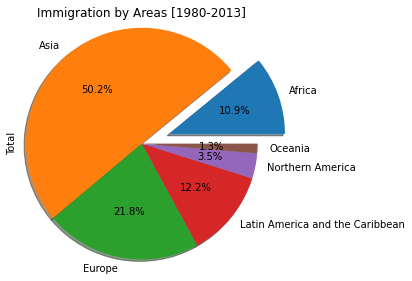

In [14]:
#PIE CHART
#Explode the slice Africa

data_continents = dataset.groupby('AreaName', axis = 0).sum()
explode = (0.3, 0, 0, 0, 0, 0)
data_continents['Total'].plot(kind='pie', radius=1.2, autopct='%1.1f%%', explode = explode, shadow = True)

plt.title('Immigration by Areas [1980-2013]')
plt.tight_layout()


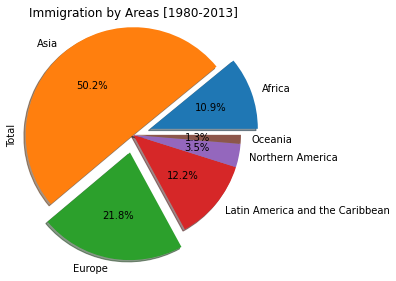

In [15]:
#PIE CHART
#Explode a slice

data_continents = dataset.groupby('AreaName', axis = 0).sum()
explode = (0.2, 0, 0.2, 0, 0, 0)
data_continents['Total'].plot(kind='pie', radius=1.2, autopct='%1.1f%%', explode = explode, shadow = True)

plt.title('Immigration by Areas [1980-2013]')
plt.tight_layout()


In [16]:
#AREA PLOTS
#Sort the values from the largest to the smallest

dataset.sort_values(['Total'], ascending = False, axis = 0, inplace = True)
dataset.head()

Type  ...   Total
OdName                                                          ...        
India                                               Immigrants  ...  699242
China                                               Immigrants  ...  662705
United Kingdom of Great Britain and Northern Ir...  Immigrants  ...  554233
Philippines                                         Immigrants  ...  514148
Pakistan                                            Immigrants  ...  248938

[5 rows x 43 columns]

In [17]:
#Select the top 5 countries to create the area plot
top5 = dataset[years].head(5).transpose()
top5.head(10)

OdName  India  China  ...  Philippines  Pakistan
1980     8880   5123  ...         6051       978
1981     8670   6682  ...         5921       972
1982     8147   3308  ...         5249      1201
1983     7338   1863  ...         4562       900
1984     5704   1527  ...         3801       668
1985     4211   1816  ...         3150       514
1986     7150   1960  ...         4166       691
1987    10189   2643  ...         7360      1072
1988    11522   2758  ...         8639      1334
1989    10343   4323  ...        11865      2261

[10 rows x 5 columns]

Text(0.5, 0, 'Years')

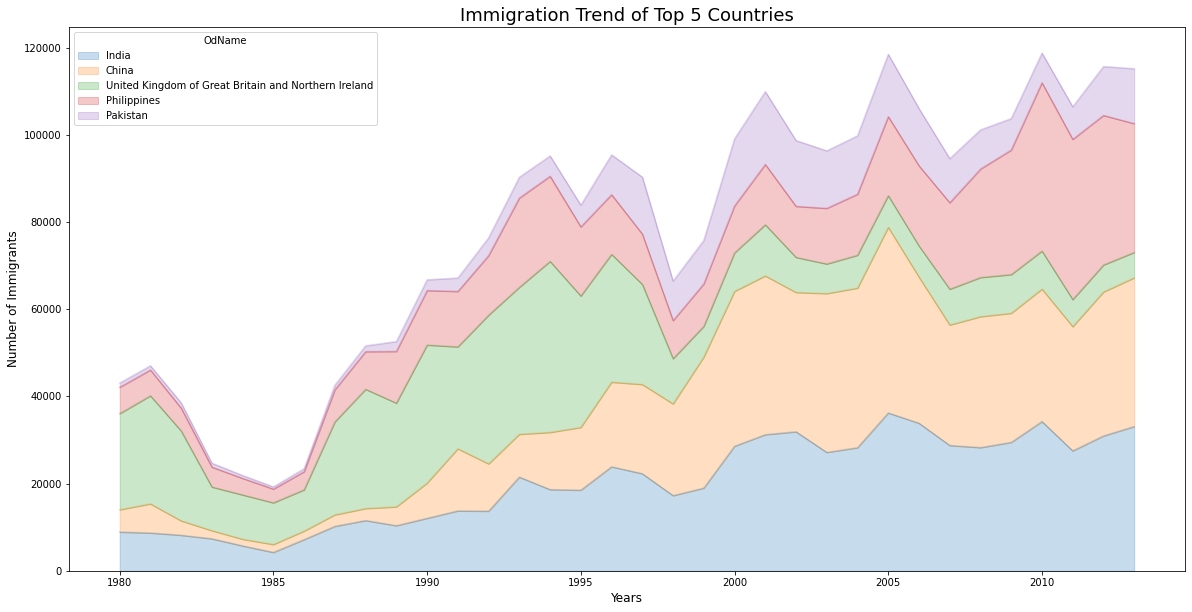

In [18]:
# Plot the immigration trend of the top5 countries
top5.plot(kind='area', 
             alpha=0.25, # 0-1, default value a= 0.5
             figsize=(20, 10),)

plt.title('Immigration Trend of Top 5 Countries', size=18)
plt.ylabel('Number of Immigrants', size=12)
plt.xlabel('Years', size=12)


In [19]:
#HORIZONTAL BAR CHART TO COMPARE IMMIGRATION - TOP 5

bar_top5 = dataset.loc[:,years].head(5)
bar_top5.head(5)

1980   1981  ...   2012   2013
OdName                                                            ...              
India                                                8880   8670  ...  30933  33087
China                                                5123   6682  ...  33024  34129
United Kingdom of Great Britain and Northern Ir...  22045  24796  ...   6195   5827
Philippines                                          6051   5921  ...  34315  29544
Pakistan                                              978    972  ...  11227  12603

[5 rows x 34 columns]

In [20]:
# Extract data from India and China (Top2)
data_CI = dataset.loc[['India','China'], years].transpose()
data_CI.reset_index(inplace=True)
data_CI.rename(columns={'index':'Year'},inplace=True)
data_CI.head()

OdName  Year  India  China
0       1980   8880   5123
1       1981   8670   6682
2       1982   8147   3308
3       1983   7338   1863
4       1984   5704   1527

Text(0.5, 1.0, 'Immigration from top 2 countries between 1980 and 2013')

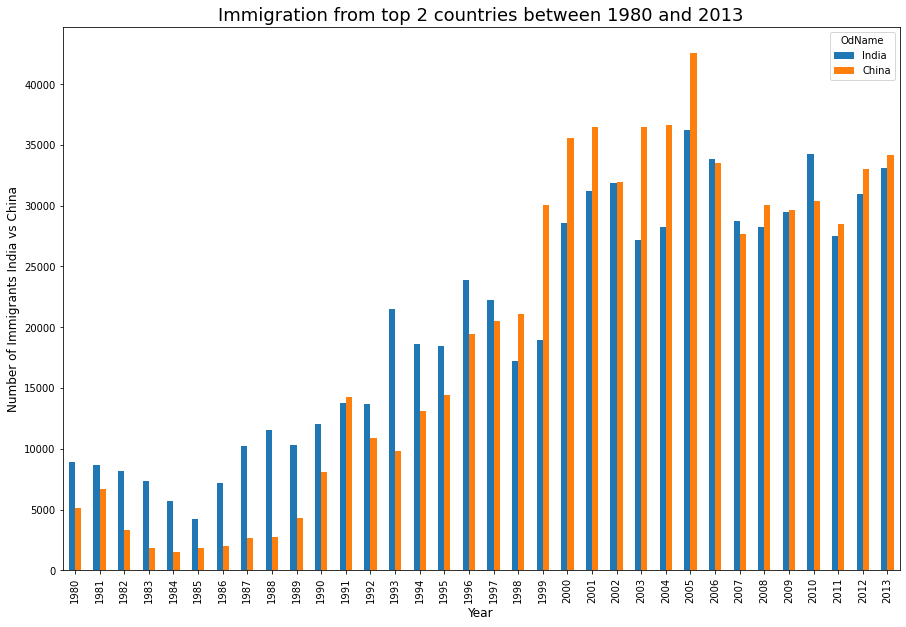

In [21]:
# Plot chart to compare India vs China immigration
ax0= data_CI.plot(kind='bar',  x='Year',figsize=(15, 10))

ax0.set_xlabel('Year', fontsize=12)
ax0.set_ylabel('Number of Immigrants India vs China',fontsize=12)
ax0.set_title('Immigration from top 2 countries between 1980 and 2013', fontsize=18)


Text(0.5, 1.0, 'Immigration from India')

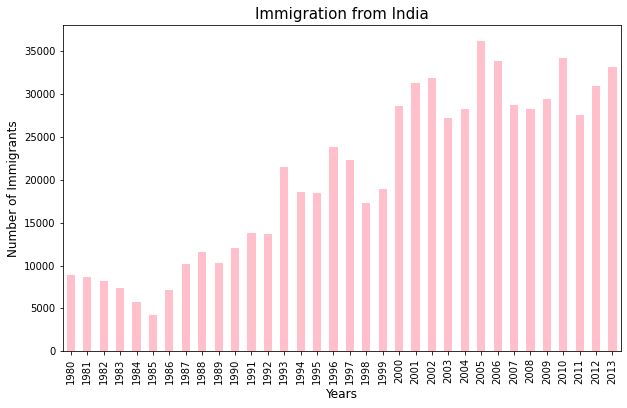

In [22]:
#India bar chart

india = dataset.loc['India',years]

india.plot(kind='bar',figsize=(10,6), color='pink')
plt.xlabel('Years', fontsize = 12)
plt.ylabel('Number of Immigrants', fontsize = 12)
plt.title('Immigration from India', fontsize = 15)


Text(0.5, 0, 'Number of Immigrants')

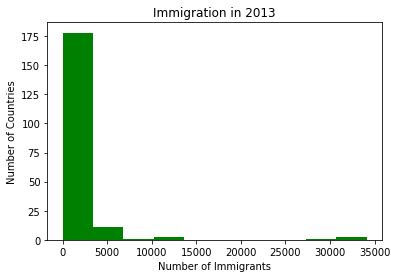

In [23]:
#HISTOGRAM

dataset['2013'].plot(kind = 'hist', color = 'green')


plt.title('Immigration in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')



Text(0.5, 0, 'Number of Immigrants')

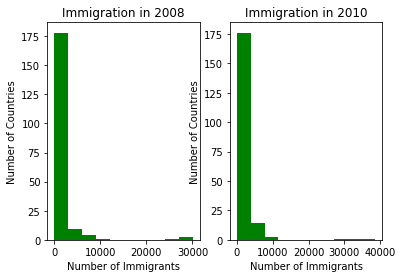

In [24]:
#COMPARING TWO DIFFERENT YEAcRS (SUBPLOTS)

plt.subplot(1, 2, 1)
dataset['2008'].plot(kind = 'hist', color = 'green')
plt.title('Immigration in 2008')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

plt.subplot(1, 2, 2)
dataset['2010'].plot(kind = 'hist', color = 'green')
plt.title('Immigration in 2010')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

#plt.tight_layout(pad = 3.0)

Text(0, 0.5, 'Number of immigrants')

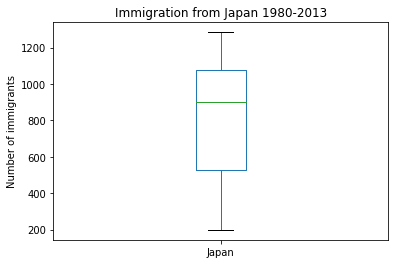

In [25]:
#BOX PLOT

japan = dataset.loc[['Japan'], years].transpose()
japan.plot(kind = 'box')

plt.title('Immigration from Japan 1980-2013')
plt.ylabel('Number of immigrants')

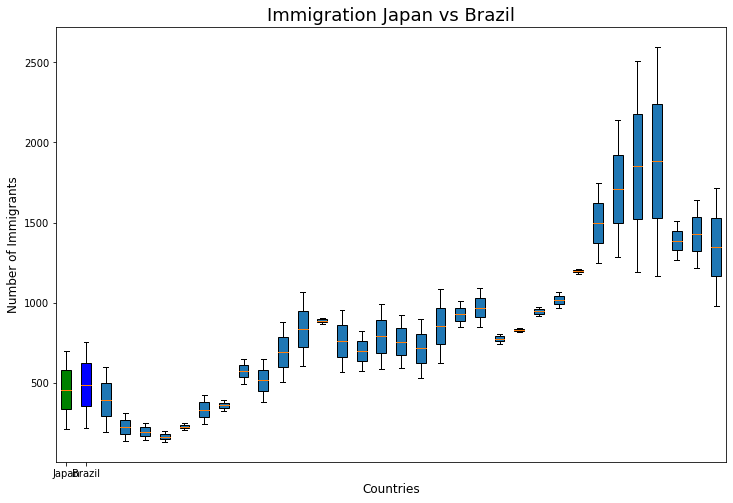

In [26]:
#MULTIPLE BOX PLOTS

fig = plt.figure(1, figsize=(12,8))

JB = dataset.loc[['Japan', 'Brazil'], years].transpose()

box = plt.boxplot(JB, patch_artist=True)

# fill with colors
colors = ['green','blue']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)     
          
plt.title('Immigration Japan vs Brazil', size=18)
plt.ylabel('Number of Immigrants', size=12)
plt.xlabel('Countries', size=12)
plt.xticks([1, 2], ['Japan','Brazil'])
plt.show()

In [27]:
#SCATTER PLOT

#creating a table

data_total = pd.DataFrame(dataset[years].sum())

#reset index
data_total.reset_index(inplace=True)

#rename columns
data_total.columns = ['Year', 'Total']

data_total.head()

Year   Total
0  1980   99137
1  1981  110563
2  1982  104271
3  1983   75550
4  1984   73417

(array([ 50000., 100000., 150000., 200000., 250000., 300000.]),
 <a list of 6 Text major ticklabel objects>)

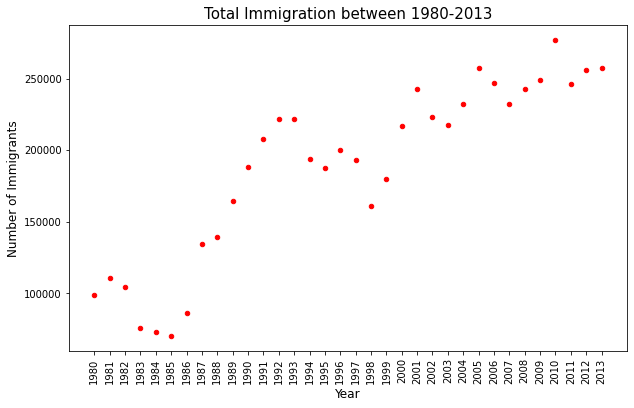

In [28]:
# SCATTER PLOT
data_total.plot(kind='scatter', x='Year', y='Total', figsize=(10, 6), color = 'red')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Number of Immigrants', fontsize = 12)
plt.title('Total Immigration between 1980-2013', fontsize = 15)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

In [29]:
#BUBBLE PLOT (COMPARING TWO COUNTRIES)
top2 = dataset.loc[:,years].head(2)
top2.head(5)

1980  1981  1982  1983  1984  ...   2009   2010   2011   2012   2013
OdName                                ...                                   
India   8880  8670  8147  7338  5704  ...  29456  34235  27509  30933  33087
China   5123  6682  3308  1863  1527  ...  29622  30391  28502  33024  34129

[2 rows x 34 columns]

In [30]:
# Extract data from India and China (Top2)
data_CI = dataset.loc[['India','China'], years].transpose()
data_CI.reset_index(inplace=True)
data_CI.rename(columns={'index':'Year'},inplace=True)
data_CI.head()

OdName  Year  India  China
0       1980   8880   5123
1       1981   8670   6682
2       1982   8147   3308
3       1983   7338   1863
4       1984   5704   1527

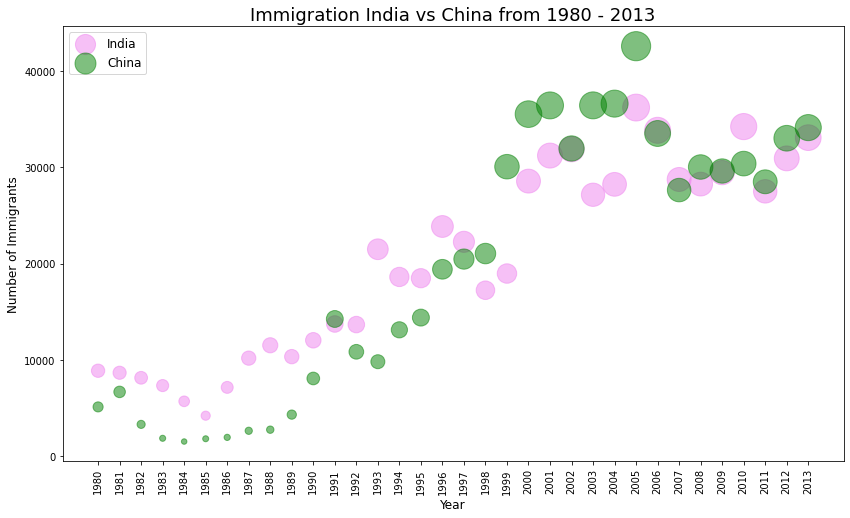

In [31]:
#Plotting

ax0= data_CI.plot(kind='scatter',
             x='Year',
             y='India',
            figsize=(14, 8),
           s=data_CI['India']/50, # size of the bubble
           alpha=0.5, # transparency
           c='violet')

ax1= data_CI.plot(kind='scatter',
             x='Year',
             y='China',
            figsize=(14, 8),
           s=data_CI['China']/50,
           alpha=0.5,
           c='green',
         ax = ax0)

plt.xticks(rotation=90)

ax0.set_xlabel('Year', fontsize=12)
ax0.set_ylabel('Number of Immigrants', fontsize=12)
ax0.set_title('Immigration India vs China from 1980 - 2013', fontsize=18)
ax0.legend(['India', 'China'], loc='upper left', fontsize=12)